In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Sample english and urdu data( you would load a full data set here)
english_sentences = [
    "Hello, how are you?",
    "I am fine, thank you!",
    "What is your name?",
    "I love programming."
]

urdu_sentences = [
    "ہیلو، آپ کیسے ہیں؟",
    "میں ٹھیک ہوں، شکریہ!",
    "آپ کا نام کیا ہے؟",
    "مجھے پروگرامنگ پسند ہے۔"
]

# Tokenizer setup for English and Urdu
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer_ur = tf.keras.preprocessing.text.Tokenizer(filters='')#no filters to keep punctuation

# Fit tokenizers on the sentences
tokenizer_en.fit_on_texts(english_sentences)
tokenizer_ur.fit_on_texts(urdu_sentences)

# Convert sentences to integers sequences
X = tokenizer_en.texts_to_sequences(english_sentences)
y = tokenizer_ur.texts_to_sequences(urdu_sentences)

print(X)
print(y)

# Padding the sequences so they have the same length
max_len = 10

X_pad = pad_sequences(X, maxlen=max_len, padding='post')
y_pad = pad_sequences(y, maxlen=max_len, padding='post')

# Vocabulary sizes
vocab_size_en = len(tokenizer_en.word_index) + 1
# word_index gives a dictionary of words and their corresponding indices
# word_index is 1-based index, hence +1 for padding token
vocab_size_ur = len(tokenizer_ur.word_index) + 1

print(f"English Vocabulary Size: {vocab_size_en}")
print(f"Urdu Vocabulary Size: {vocab_size_ur}")

[[2, 3, 4, 5], [1, 6, 7, 8, 9], [10, 11, 12, 13], [1, 14, 15]]
[[2, 1, 3, 4], [5, 6, 7, 8], [1, 9, 10, 11, 12], [13, 14, 15, 16]]
English Vocabulary Size: 16
Urdu Vocabulary Size: 17


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, SimpleRNN, Dropout

# Encoder: Processes the English sentences
encoder_inputs = Input(shape=(max_len,))
encoder_embedding = Embedding(vocab_size_en, 128)(encoder_inputs)
encoder_rnn = SimpleRNN(256, return_state=True)
encoder_output, state_h = encoder_rnn(encoder_embedding)

# Decoder: Processes the Urdu sentences
decoder_inputs = Input(shape=(max_len,))
decoder_embedding = Embedding(vocab_size_ur, 128)(decoder_inputs)
decoder_rnn = SimpleRNN(256, return_sequences=True)(decoder_embedding, initial_state=state_h)
decoder_dense = Dense(vocab_size_ur, activation='softmax')(decoder_rnn)

# Create the model
model = Model([encoder_inputs, decoder_inputs], decoder_dense)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# Model summary
model.summary()
 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 10, 128)   │      2,048 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 10, 128)   │      2,176 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn          │ [(None, 256),     │     98,560 │ embedding[0][0]   │
│ (SimpleRNN)         │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_1        │ (None, 10, 256)   │     98,560 │ embedding_1[0][0… │
│ (SimpleRNN)         │                   │            │ simple_rnn[0][1]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10, 17)    │      4,369 │ simple_rnn_1[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,713 (803.57 KB)

 Trainable params: 205,713 (803.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 2.9044
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7250 - loss: 2.4423
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7750 - loss: 1.8858
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7750 - loss: 1.3581
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7750 - loss: 1.1023
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7500 - loss: 0.9661
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7250 - loss: 0.8478
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8250 - loss: 0.7418
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8000 - loss: 0.6763
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8750 - loss: 0.6186
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9000 - loss: 0.5621
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8750 -

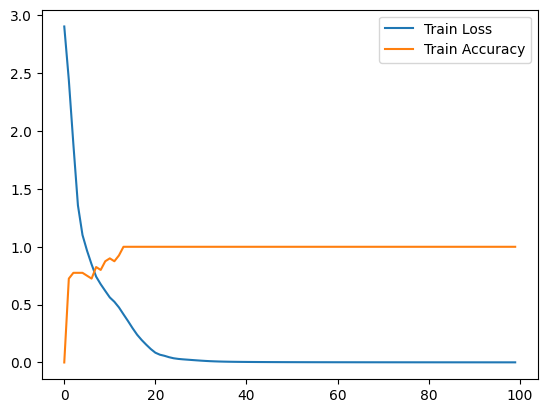

In [4]:
# prepare the training data(we need to shift the urdu target by one position)
y_shifted = np.zeros_like(y_pad)
y_shifted[:, 1:] = y_pad[:, :-1]  # Shift urdu sequences by one token

# Train the model
history = model.fit([X_pad, y_pad], np.expand_dims(y_shifted, -1), epochs=100)

# Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.show()

In [5]:
def translate(sentence):
    # Tokenize and pad the input sentence
    sequence = tokenizer_en.texts_to_sequences([sentence])
    sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict the output sequence
    output = model.predict([sequence, np.zeros_like(sequence)])

    # Convert the predicted sequence back to words
    translated_sentence = ' '.join([tokenizer_ur.index_word.get(i, '') for i in np.argmax(output[0], axis=-1)])

    return translated_sentence

# Example Translation
print(translate("I love Programming"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
 مجھے پروگرامنگ پسند ہے۔     
